In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

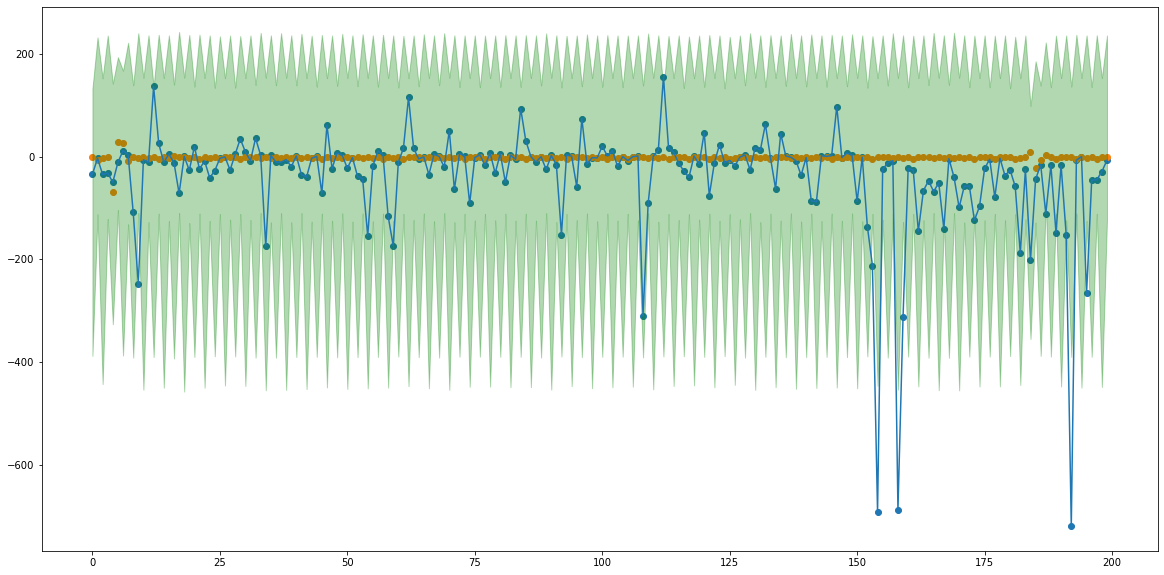

In [34]:
data = np.load("./plotweek34result/seed0epo274.npz")
y = data['truth'][0,0,:]
lower_pred = data["prediction"][0, 0, :, 0]
upper_pred = data["prediction"][0, 0, :, 2]
mean_pred = data["prediction"][0, 0, :, 1]

# plot the results
plt.figure(figsize=[20,10])
plt.plot(y,label = "True")
plt.scatter(np.arange(200),y)
plt.scatter(np.arange(200),mean_pred)
plt.fill_between(np.arange(len(y)), lower_pred, upper_pred, color='green', alpha=.3)

In [ ]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
        'District of Columbia', 'Florida', 'Georgia',
        'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota',  'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania',  
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming']

## Plot with each county

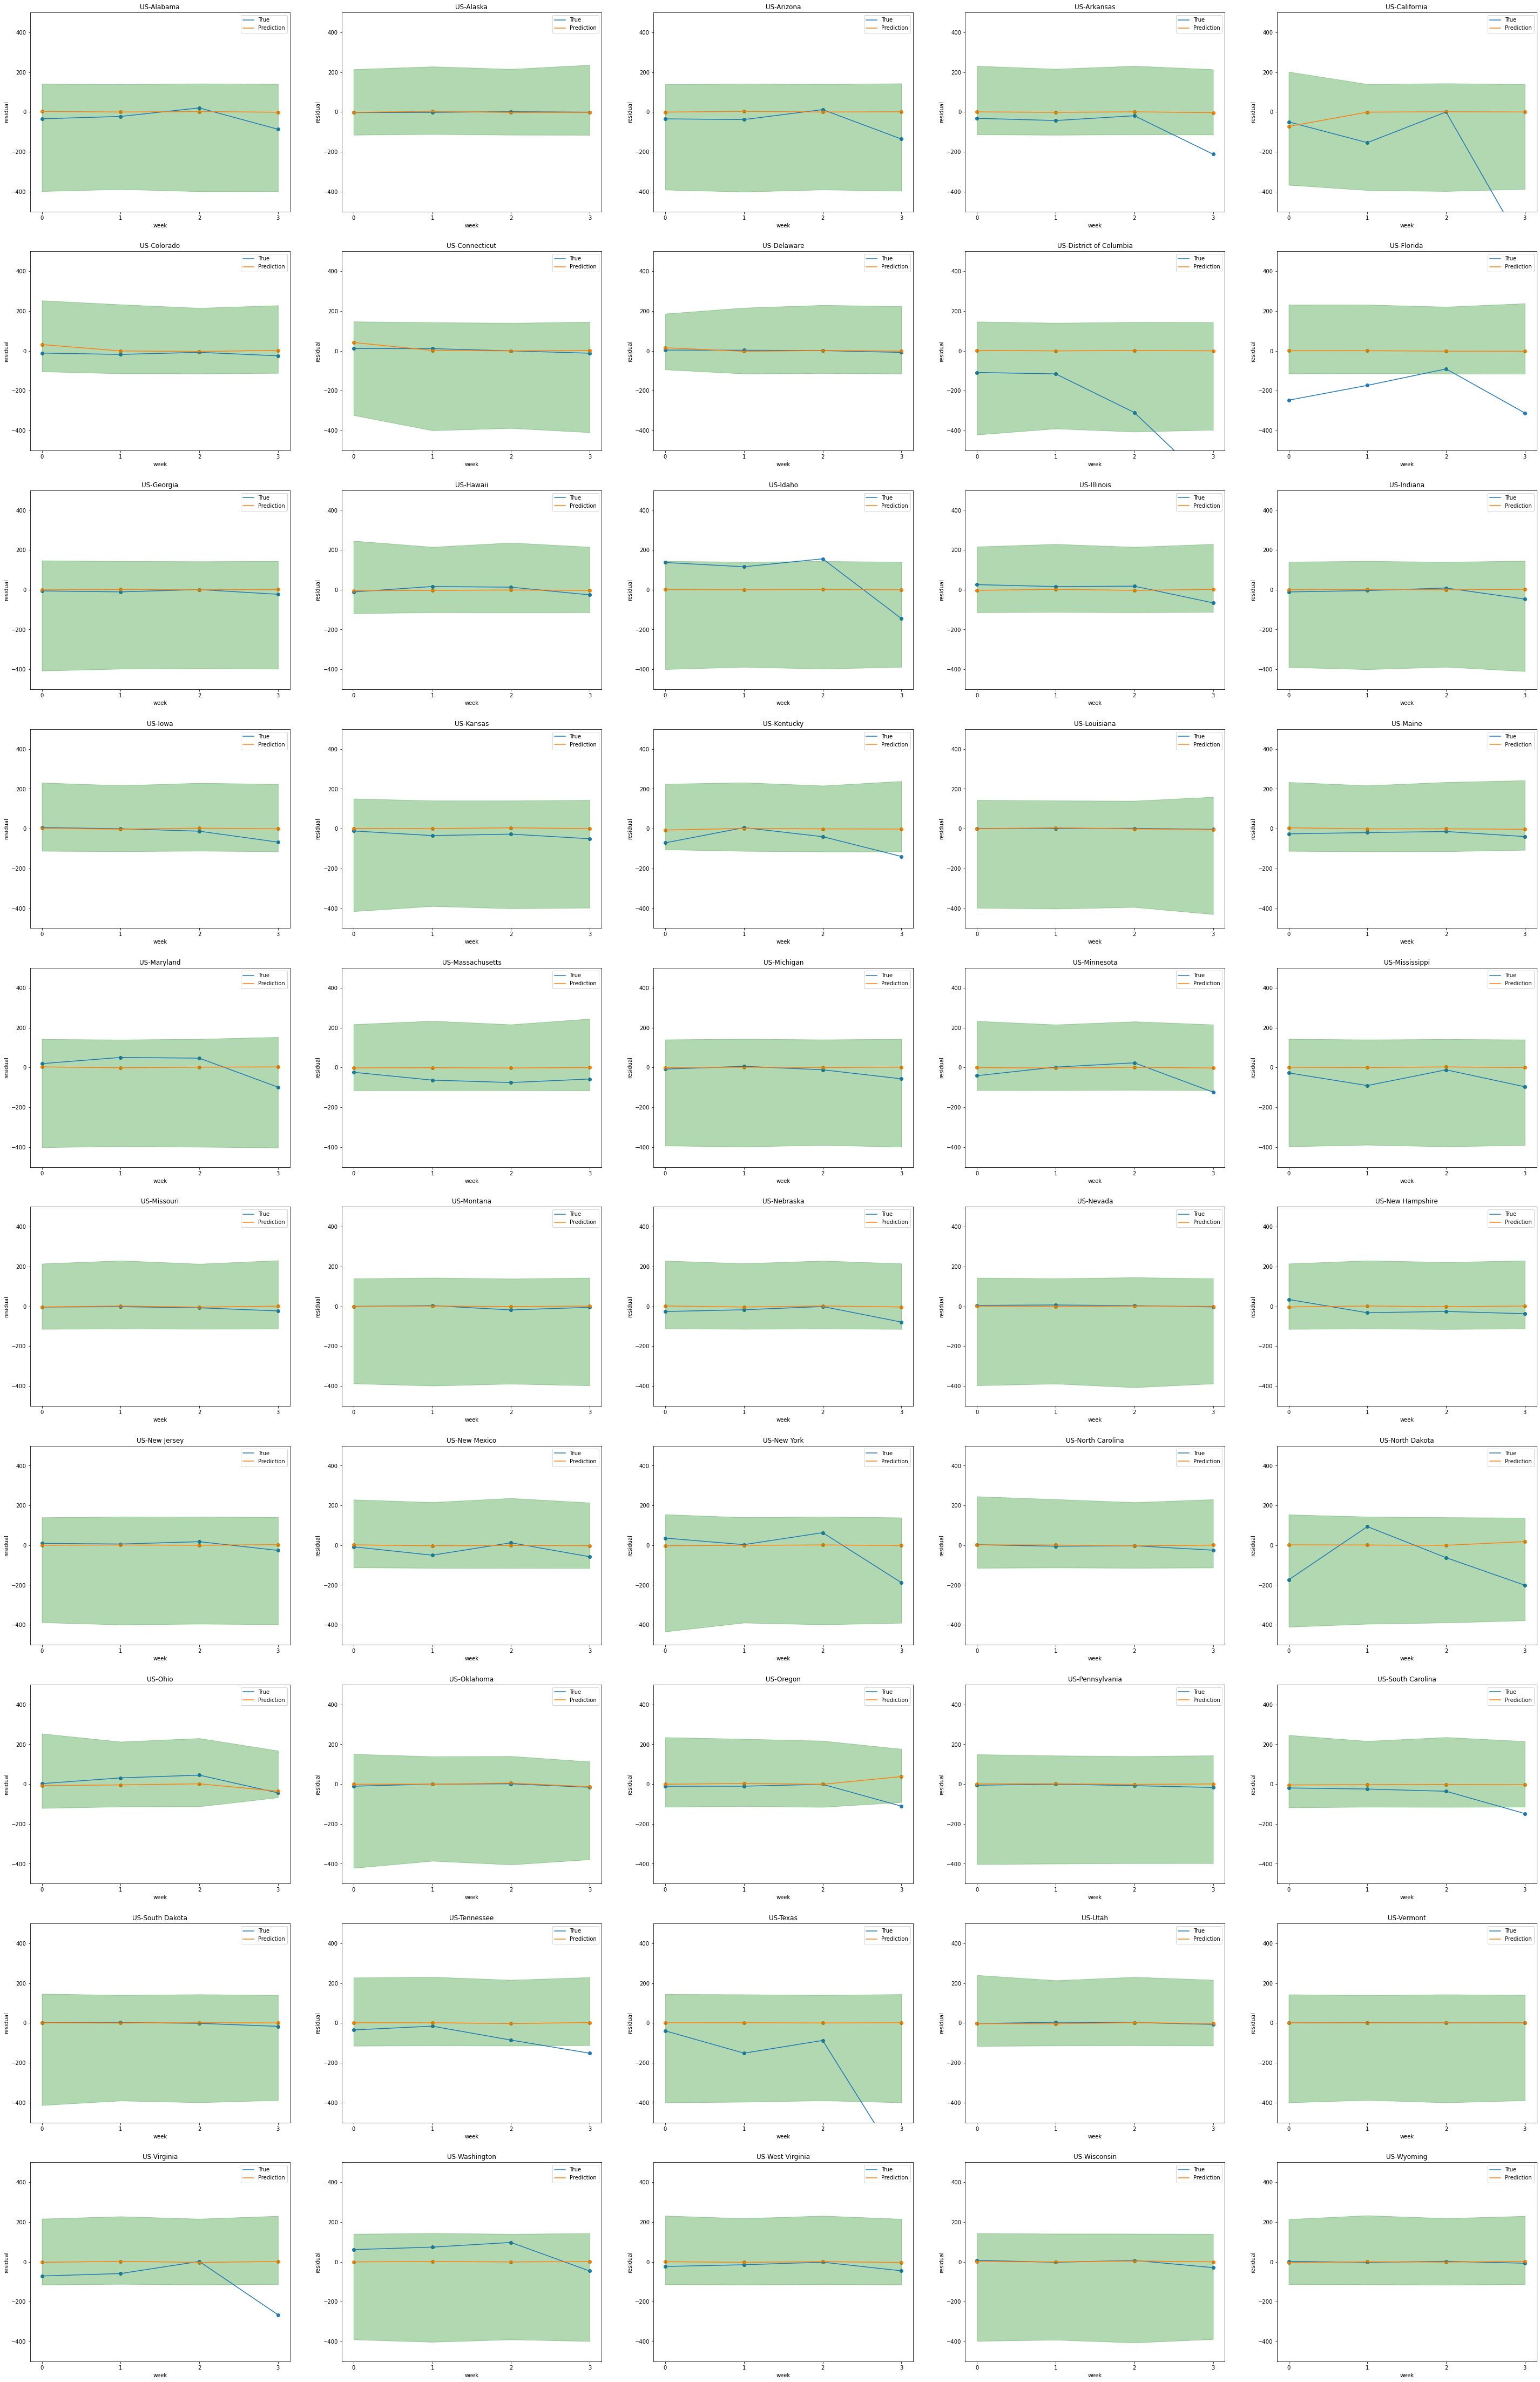

In [35]:
data = np.load("./plotweek34result/seed7epo389.npz")

# get y_true and confidence interval
f = plt.figure(figsize=(50,80))
for i in range(50):
    state_id = [i,i+50,i+100,i+150]
    state = states[i]
    y = data['truth'][0,0,state_id]
    lower_pred = data["prediction"][0, 0, state_id, 0]
    upper_pred = data["prediction"][0, 0, state_id, 2]
    mean_pred = data["prediction"][0, 0, state_id, 1]

    # plot the results
    
    ax = f.add_subplot(10,5,i+1)
    plt.ylim([-500,500])
    plt.plot(y,label = "True")
    plt.plot(mean_pred, label = "Prediction")
    plt.legend()
    plt.xticks(range(0,4))
    plt.scatter(np.arange(4),y)
    plt.scatter(np.arange(4),mean_pred)
    plt.fill_between(np.arange(len(y)), lower_pred, upper_pred, color='green', alpha=.3)
    plt.ylabel("residual")
    plt.xlabel("week")
    plt.title("US-"+state)
plt.savefig("quantile.png")

## Plot2
Plot by data with each state correspond to 4 consective point

In [ ]:
data = np.load("./plotweek34result/seed7epo389.npz")

# get y_true and confidence interval
f = plt.figure(figsize=(50,80))
for i in range(50):
    state_id = np.arange(4*i,4*(i+1))
    state = states[i]
    y = data['truth'][0,0,state_id]
    lower_pred = data["prediction"][0, 0, state_id, 0]
    upper_pred = data["prediction"][0, 0, state_id, 2]
    mean_pred = data["prediction"][0, 0, state_id, 1]

    # plot the results
    
    ax = f.add_subplot(10,5,i+1)
    plt.ylim([-300,300])
    plt.plot(y,label = "True")
    plt.plot(mean_pred, label = "Prediction")
    plt.scatter(np.arange(4),y)
    plt.scatter(np.arange(4),mean_pred)
    plt.legend()
    plt.xticks(range(0,4))
#     plt.scatter(np.arange(4),y)
#     plt.scatter(np.arange(4),mean_pred)
    plt.fill_between(np.arange(len(y)), lower_pred, upper_pred, color='green', alpha=.3)
    plt.ylabel("residual")
    plt.xlabel("week")
    plt.title("US-"+state)
plt.savefig("quantile")

## US death data

In [32]:
death = pd.read_csv("time_series_covid19_deaths_US.csv")
death_by_county = death.groupby("Province_State").sum()

## Extra plot

In [ ]:
data = np.load("./plotweek34result/seed7epo389.npz")
first_state_id = np.arange(0,4)
y = data['truth'][0,0, first_state_id]
lower_pred = data["prediction"][0, 0, first_state_id, 0]
upper_pred = data["prediction"][0, 0, first_state_id, 2]
mean_pred = data["prediction"][0, 0, first_state_id, 1]

# plot the results
f = plt.figure()
ax = f.add_subplot(121)
plt.scatter(np.arange(4),y)
plt.scatter(np.arange(4),mean_pred)
#plt.fill_between(np.arange(len(y)), lower_pred, upper_pred, color='green', alpha=.3)
plt.title("state with consecutive 4 number")

first_state_id = np.arange(0,200,50)
y2 = data['truth'][0,0, first_state_id]
lower_pred2 = data["prediction"][0, 0, first_state_id, 0]
upper_pred2 = data["prediction"][0, 0, first_state_id, 2]
mean_pred2 = data["prediction"][0, 0, first_state_id, 1]

ax2 = f.add_subplot(122)
plt.scatter(np.arange(4),y2)
plt.scatter(np.arange(4),mean_pred2)
plt.title("state arange every 50 data")